In [1]:
from functions import *

# Cubo 147

In [2]:
cluster_dict_147 = {}
#for i in ["148", "298", "398", "498", "623"]:
for i in ["298", "398", "498", "623"]:

    ###########################################

    traj_dir = '/mnt/a/MD_Trajectories/PtCO/NPs/continued/cubo_147/'
    traj_name = f"Pt147_cuboct_{i}K_6.all.bin"

    #p_name = "Pt309_cuboct_498K"
    #input_dir = "/mnt/a/MD_Trajectories/PtCO/NPs/Inputs/"
    #input_dir = "/mnt/sdcc/sdcc+u/nmarcella/MD_EXAFS_inputs/231228/"

    #pipeline.source.num_frames
    ###########################################
    
    traj_path = traj_dir + traj_name

    pipeline = import_file(traj_path)

    test_pl = MD_EXAFS_Analysis_Pipeline_PtCO(pipeline, file_params={"framerange": range(0,pipeline.source.num_frames,100),"atoms":{"Pt":1, "C":2, "O":3}, "cutoff":3}, custom_analysis_func=find_adsorbed_CO)
    #test_pl = MD_EXAFS_Binary_Pipeline_General(pipeline, file_params={"framerange": range(15999,16000),"atoms":{"Pt":1}, "cutoff":3})
    test_pl.run()

    data = test_pl.data
    n_atoms = test_pl.n_atoms_list

    n_atoms = np.array(n_atoms)
    n_co = np.mean(n_atoms[:,1])

    cluster_dict_147[i] = {"CO" :n_atoms[:,1], "data":data}


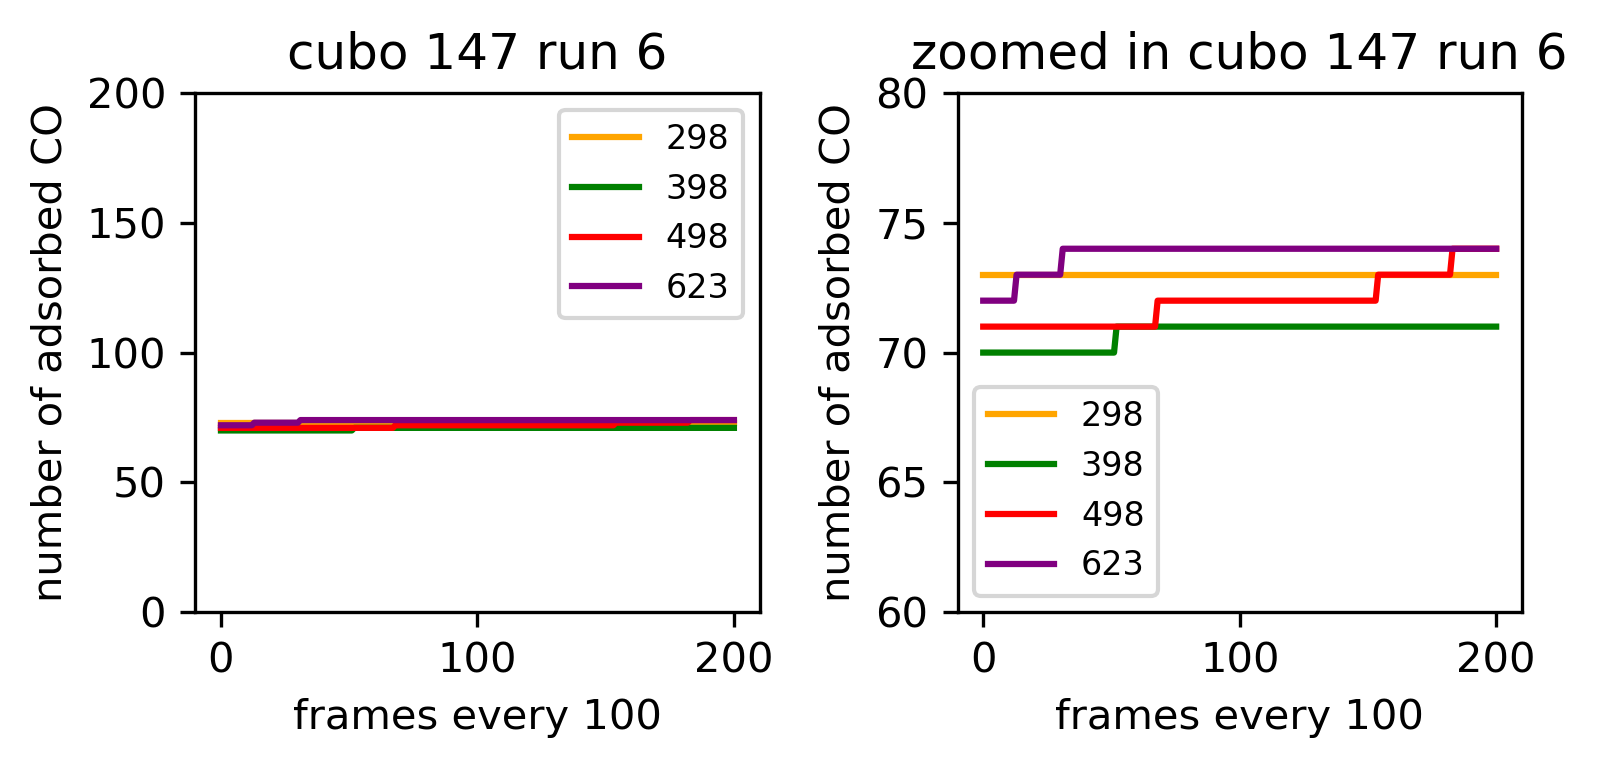

In [3]:
size = 147
run = 6 

fig, ax = plt.subplots(1,2,figsize=(2*2.66,2.66), dpi=300)

colors = {"148":"blue", "298":"orange","398":"green", "498":"red", "623":"purple"}
#for i in ["148", "298", "398", "498", "623"]:
for i in ["298", "398", "498", "623"]:
    ax[0].plot(cluster_dict_147[i]["CO"], label=i, color=colors[i])
ax[0].set_title(f"cubo {size} run {run}")
ax[0].set_ylabel("number of adsorbed CO")
ax[0].set_xlabel("frames every 100")
ax[0].set_ylim(0,200)
ax[0].legend(fontsize=8)

for i in ["298", "398", "498", "623"]:
    ax[1].plot(cluster_dict_147[i]["CO"], label=i, color=colors[i])
ax[1].set_title(f"zoomed in cubo {size} run {run}")
ax[1].set_ylabel("number of adsorbed CO")
ax[1].set_xlabel("frames every 100")
ax[1].set_ylim(60,80)
ax[1].legend(fontsize=8)

fig.tight_layout()

In [36]:
data = cluster_dict_147["298"]["data"]
results = classify_and_find_distances_array(data[0])
results[:,1]

In [ ]:
data = cluster_dict_147["298"]["data"]

n_frames = len(data)

new_array_top = []
new_array_bridge = []
new_array_multi = []

for frame_data in data:

    results = classify_and_find_distances_array(frame_data)

    top_co = results[np.where(results[:, 1] == 1)[0]]
    bridge_co = results[np.where(results[:, 1] == 2)[0]]
    multi_co = results[np.where(results[:, 1] > 2)[0]]

    
    n_top = top_co.shape[0]
    mean_top = np.mean(top_co[:,2])
    std_top = np.std(top_co[:,2])

    new_array_top.append([n_top, mean_top, std_top])

    if len(bridge_co)>0:
        n_bridge = bridge_co.shape[0]
        mean_bridge = np.mean(bridge_co[:,2])
        std_bridge = np.std(bridge_co[:,2])

        new_array_bridge.append([n_bridge, mean_bridge, std_bridge])
    else:
        new_array_bridge.append([0, 0, 0])

    if len(multi_co)>0:
        n_multi = len(multi_co)
        mean_multi = np.mean(multi_co[:,2])
        std_multi = np.std(multi_co[:,2])

        new_array_multi.append([n_multi, mean_multi, std_multi])
    else:
        new_array_multi.append([0, 0, 0])

new_array_top = np.array(new_array_top)
new_array_bridge = np.array(new_array_bridge)
new_array_multi = np.array(new_array_multi)

In [74]:
def bond_lengths(dic):

    data = dic["data"]

    n_frames = len(data)

    new_array_top = []
    new_array_bridge = []
    new_array_multi = []

    for frame_data in data:

        results = classify_and_find_distances_array(frame_data)

        top_co = results[np.where(results[:, 1] == 1)[0]]
        bridge_co = results[np.where(results[:, 1] == 2)[0]]
        multi_co = results[np.where(results[:, 1] > 2)[0]]

        
        n_top = top_co.shape[0]
        mean_top = np.mean(top_co[:,2])
        std_top = np.std(top_co[:,2])

        new_array_top.append([n_top, mean_top, std_top])

        if len(bridge_co)>0:
            n_bridge = bridge_co.shape[0]
            mean_bridge = np.mean(bridge_co[:,2])
            std_bridge = np.std(bridge_co[:,2])

            new_array_bridge.append([n_bridge, mean_bridge, std_bridge])
        else:
            new_array_bridge.append([0, 0, 0])

        if len(multi_co)>0:
            n_multi = len(multi_co)
            mean_multi = np.mean(multi_co[:,2])
            std_multi = np.std(multi_co[:,2])

            new_array_multi.append([n_multi, mean_multi, std_multi])
        else:
            new_array_multi.append([0, 0, 0])

    new_array_top = np.array(new_array_top)
    new_array_bridge = np.array(new_array_bridge)
    new_array_multi = np.array(new_array_multi)

    n_top = np.mean(new_array_top[:,0])
    n_bridge = np.mean(new_array_bridge[:,0])
    n_multi = np.mean(new_array_multi[:,0])

    r_top = np.mean(new_array_top[:,1][new_array_top[:,1]>1])
    r_bridge = np.mean(new_array_bridge[:,1][new_array_bridge[:,1]>1])
    r_multi = np.mean(new_array_multi[:,1][new_array_multi[:,1]>1])

    return n_top, n_bridge, n_multi, r_top, r_bridge, r_multi

In [95]:
def bond_lengths_WCUCMC(dic):

    data = dic["data"]

    n_frames = len(data)

    new_array_WC = []
    new_array_UC = []
    new_array_multi = []

    for frame_data in data:

        results = classify_and_find_distances_array(frame_data, cutoff_distance=3.0, neighbor_cutoff=3.5, min_neighbors=8)

        wc_co = results[np.where(results[:, 1] == "WC")[0]]
        uc_co = results[np.where(results[:, 1] == "UC")[0]]
        multi_co = results[np.where(results[:, 1] == "MC")[0]]


        if len(wc_co)>0:
            n_WC = wc_co.shape[0]
            mean_WC = np.mean(wc_co[:,2])
            std_WC = np.std(wc_co[:,2])
            new_array_WC.append([n_WC, mean_WC, std_WC])
        else:
            new_array_WC.append([0, 0, 0])
        


        if len(uc_co)>0:
            n_UC = uc_co.shape[0]
            mean_UC = np.mean(uc_co[:,2])
            std_UC = np.std(uc_co[:,2])

            new_array_UC.append([n_UC, mean_UC, std_UC])
        else:
            new_array_UC.append([0, 0, 0])

        if len(multi_co)>0:
            n_multi = len(multi_co)
            mean_multi = np.mean(multi_co[:,2])
            std_multi = np.std(multi_co[:,2])

            new_array_multi.append([n_multi, mean_multi, std_multi])
        else:
            new_array_multi.append([0, 0, 0])

    new_array_WC = np.array(new_array_WC)
    new_array_UC = np.array(new_array_UC)
    new_array_multi = np.array(new_array_multi)

    n_WC = np.mean(new_array_WC[:,0])
    n_UC = np.mean(new_array_UC[:,0])
    n_multi = np.mean(new_array_multi[:,0])

    r_WC = np.mean(new_array_WC[:,1][new_array_WC[:,1]>1])
    r_UC = np.mean(new_array_UC[:,1][new_array_UC[:,1]>1])
    r_multi = np.mean(new_array_multi[:,1][new_array_multi[:,1]>1])

    return n_WC, n_UC, n_multi, r_WC, r_UC, r_multi

In [75]:
# bond_lengths_147 = {}
# for i in ["298", "398", "498", "623"]:
#     n_top, n_bridge, n_multi, r_top, r_bridge, r_multi = bond_lengths(cluster_dict_147[i])
#     bond_lengths_147[i] = {"n_top":n_top, "n_bridge":n_bridge,"n_multi":n_multi,"r_top":r_top,"r_bridge":r_bridge,"r_multi":r_multi}

/home/nickj/miniconda3/envs/OVITO/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nickj/miniconda3/envs/OVITO/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [41]:
bond_lengths_147 = {}
for i in ["298", "398", "498", "623"]:
    n_WC, n_UC, n_multi, r_WC, r_UC, r_multi = bond_lengths_WCUCMC(cluster_dict_147[i])
    bond_lengths_147[i] = {"n_WC":n_WC, "n_UC":n_UC,"n_multi":n_multi,"r_WC":r_WC,"r_UC":r_UC,"r_multi":r_multi}

KeyError: 'n_top'

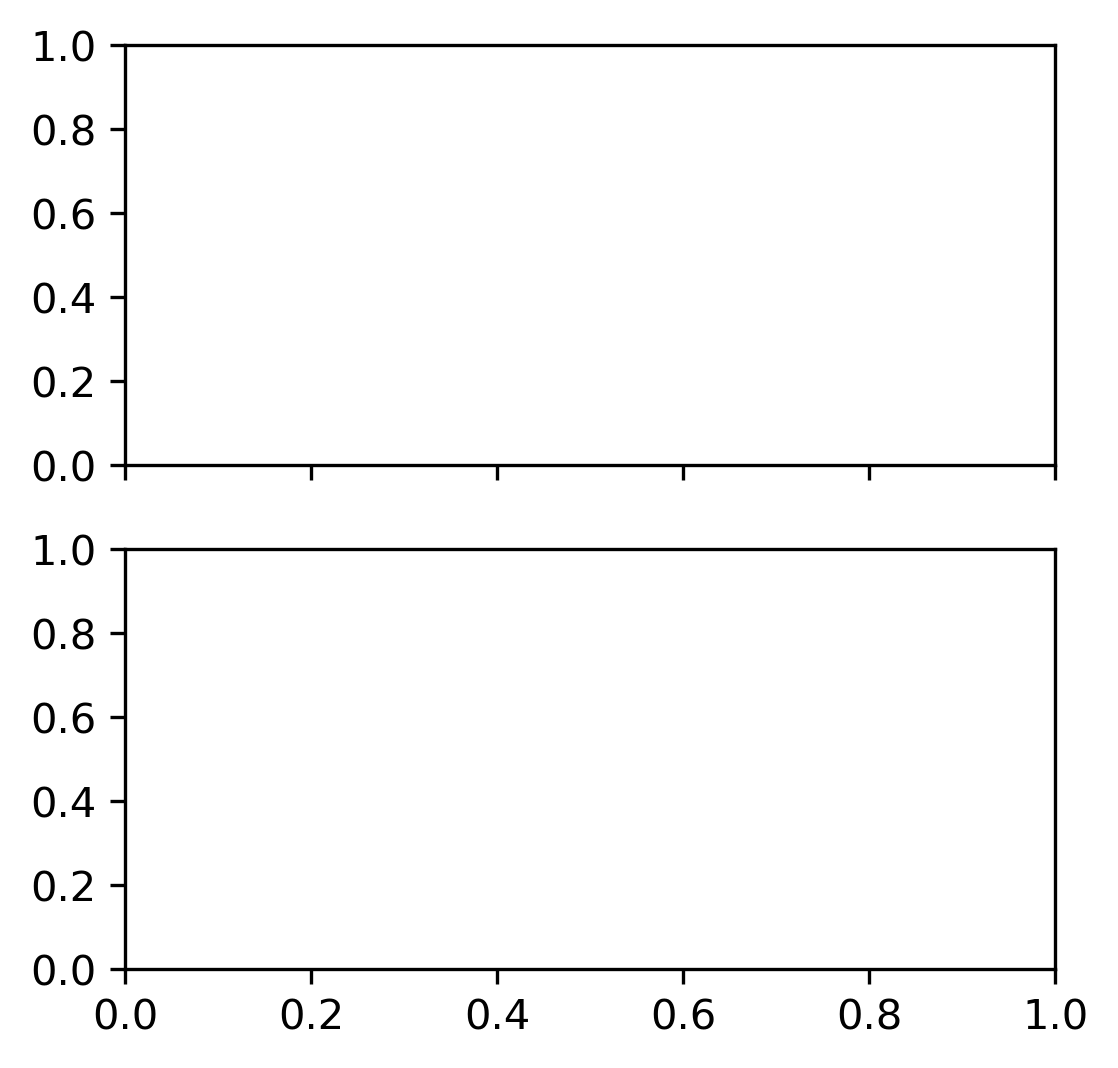

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming bond_lengths_147 is defined somewhere in your code with the necessary data

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4,4), dpi=300)

# Top
x, y = np.array([[int(i), bond_lengths_147[i]["n_top"]] for i in ["298", "398", "498", "623"]]).T
axs[0].scatter(x, y, label="Number of Top CO")
axs[0].set_ylim(68, 75)
axs[0].set_ylabel("Count")
axs[0].legend(loc="upper left", fontsize=6)

# Adding another dataset for Top on the right
ax2 = axs[0].twinx()
x, y2 = np.array([[int(i), bond_lengths_147[i]["r_top"]] for i in ["298", "398", "498", "623"]]).T
ax2.scatter(x, y2, label="C-O distance", color='r', marker='o')
ax2.set_ylabel("Interatomic distance", fontsize=8)
ax2.set_ylim(1.16, 1.19)
ax2.legend(loc="upper right", fontsize=6)

# Bridge
x, y = np.array([[int(i), bond_lengths_147[i]["n_bridge"]] for i in ["298", "398", "498", "623"]]).T
axs[1].scatter(x, y, label="Number of Bridge CO")
axs[1].set_ylim(0, 5)
axs[1].set_ylabel("Count")
axs[1].set_xlabel("Temperature (K)")
axs[1].legend(loc="upper left", fontsize=6)

# Adding another dataset for Bridge on the right
ax3 = axs[1].twinx()
x, y3 = np.array([[int(i), bond_lengths_147[i]["r_bridge"]] for i in ["298", "398", "498", "623"]]).T
ax3.scatter(x, y3, label="C-O distance", color='r', marker='o')
ax3.set_ylabel("Interatomic distance", fontsize=8)
ax3.set_ylim(1.16, 1.19)
ax3.legend(loc="upper right", fontsize=6)

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()


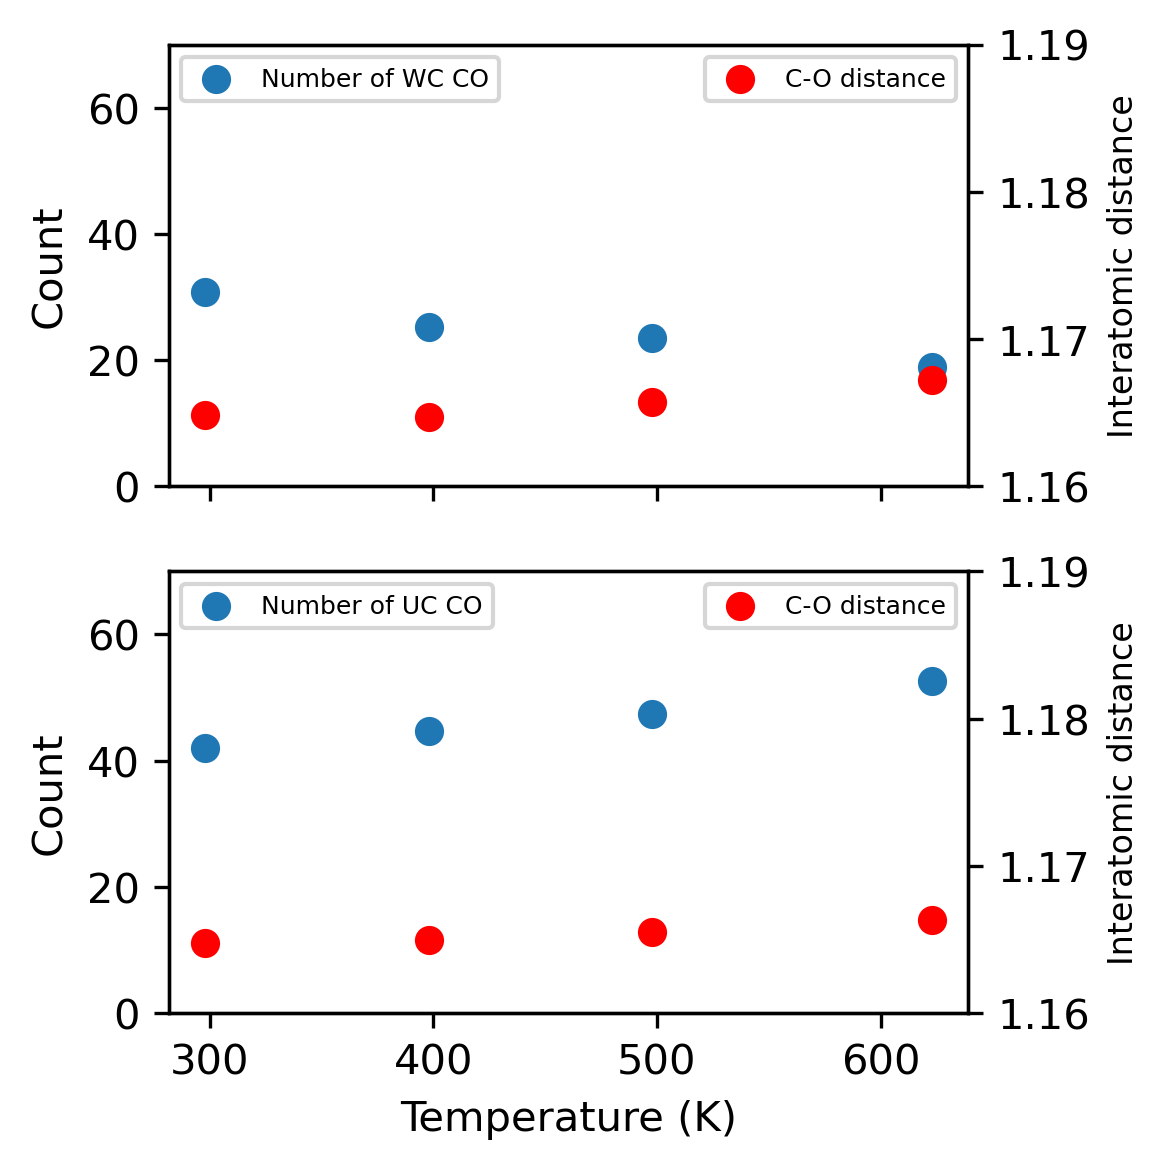

In [42]:
import matplotlib.pyplot as plt
import numpy as np

bond_lengths_147 = {}
for i in ["298", "398", "498", "623"]:
    n_WC, n_UC, n_multi, r_WC, r_UC, r_multi = bond_lengths_WCUCMC(cluster_dict_147[i])
    bond_lengths_147[i] = {"n_WC":n_WC, "n_UC":n_UC,"n_multi":n_multi,"r_WC":r_WC,"r_UC":r_UC,"r_multi":r_multi}

# Assuming bond_lengths_147 is defined somewhere in your code with the necessary data

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4,4), dpi=300)

# WC
x, y = np.array([[int(i), bond_lengths_147[i]["n_WC"]] for i in ["298", "398", "498", "623"]]).T
axs[0].scatter(x, y, label="Number of WC CO")
axs[0].set_ylim(0, 70)
axs[0].set_ylabel("Count")
axs[0].legend(loc="upper left", fontsize=6)

# Adding another dataset for WC on the right
ax2 = axs[0].twinx()
x, y2 = np.array([[int(i), bond_lengths_147[i]["r_WC"]] for i in ["298", "398", "498", "623"]]).T
ax2.scatter(x, y2, label="C-O distance", color='r', marker='o')
ax2.set_ylabel("Interatomic distance", fontsize=8)
ax2.set_ylim(1.16, 1.19)
ax2.legend(loc="upper right", fontsize=6)

# UC
x, y = np.array([[int(i), bond_lengths_147[i]["n_UC"]] for i in ["298", "398", "498", "623"]]).T
axs[1].scatter(x, y, label="Number of UC CO")
axs[1].set_ylim(0, 70)
axs[1].set_ylabel("Count")
axs[1].set_xlabel("Temperature (K)")
axs[1].legend(loc="upper left", fontsize=6)

# Adding another dataset for UC on the right
ax3 = axs[1].twinx()
x, y3 = np.array([[int(i), bond_lengths_147[i]["r_UC"]] for i in ["298", "398", "498", "623"]]).T
ax3.scatter(x, y3, label="C-O distance", color='r', marker='o')
ax3.set_ylabel("Interatomic distance", fontsize=8)
ax3.set_ylim(1.16, 1.19)
ax3.legend(loc="upper right", fontsize=6)

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()


In [44]:
data = cluster_dict_147["298"]["data"]
results = classify_and_find_distances_array(data[0], cutoff_distance=3.0, neighbor_cutoff=3.5, min_neighbors=8)
results[:,1]

array(['WC', 'UC', 'UC', 'WC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC',
       'WC', 'WC', 'UC', 'WC', 'UC', 'UC', 'WC', 'WC', 'UC', 'WC', 'UC',
       'WC', 'UC', 'UC', 'WC', 'UC', 'UC', 'WC', 'WC', 'WC', 'UC', 'WC',
       'UC', 'WC', 'UC', 'WC', 'UC', 'WC', 'WC', 'UC', 'UC', 'UC', 'UC',
       'WC', 'UC', 'UC', 'WC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC',
       'UC', 'WC', 'WC', 'WC', 'UC', 'WC', 'UC', 'UC', 'UC', 'WC', 'UC',
       'UC', 'WC', 'UC', 'UC', 'UC', 'UC', 'UC'], dtype=object)

# Cubo 309

In [96]:
cluster_dict_309 = {}
#for i in ["148", "298", "398", "498", "623"]:
for i in ["323", "398", "498", "623"]: # using 323 because 298 is not complete

    ###########################################

    traj_dir = '/mnt/a/MD_Trajectories/PtCO/NPs/continued/cubo_309/'
    traj_name = f"Pt309_cuboct_{i}K_6.all.bin"

    #p_name = "Pt309_cuboct_498K"
    #input_dir = "/mnt/a/MD_Trajectories/PtCO/NPs/Inputs/"
    #input_dir = "/mnt/sdcc/sdcc+u/nmarcella/MD_EXAFS_inputs/231228/"

    #pipeline.source.num_frames
    ###########################################
    
    traj_path = traj_dir + traj_name

    pipeline = import_file(traj_path)

    test_pl = MD_EXAFS_Analysis_Pipeline_PtCO(pipeline, file_params={"framerange": range(0,pipeline.source.num_frames,100),"atoms":{"Pt":1, "C":2, "O":3}, "cutoff":3}, custom_analysis_func=find_adsorbed_CO)
    #test_pl = MD_EXAFS_Binary_Pipeline_General(pipeline, file_params={"framerange": range(15999,16000),"atoms":{"Pt":1}, "cutoff":3})
    test_pl.run()

    data = test_pl.data
    n_atoms = test_pl.n_atoms_list

    n_atoms = np.array(n_atoms)
    n_co = np.mean(n_atoms[:,1])

    cluster_dict_309[i] = {"CO" :n_atoms[:,1], "data":data}


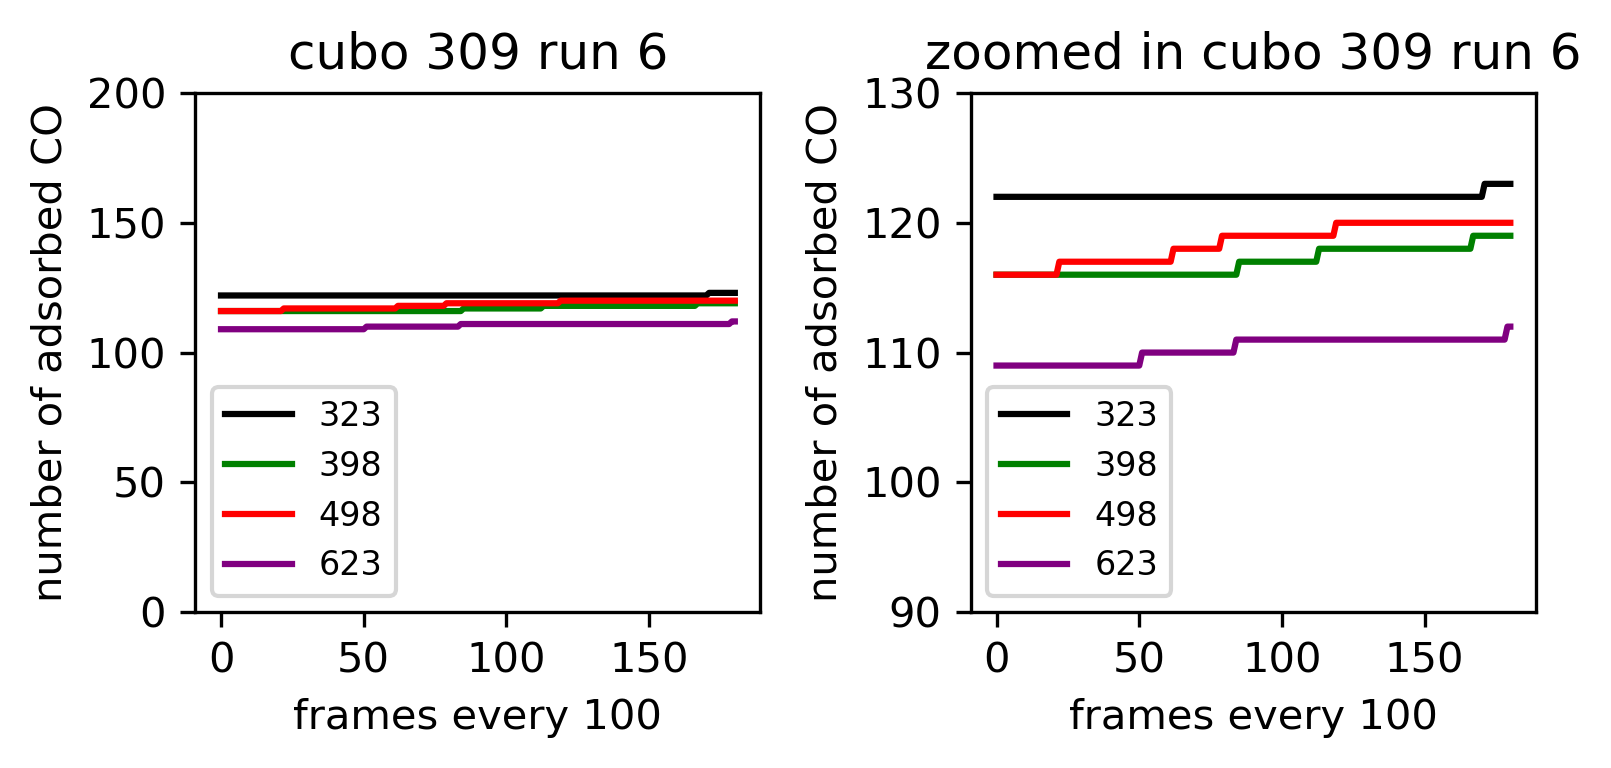

In [36]:
size = 309
run = 6 

fig, ax = plt.subplots(1,2,figsize=(2*2.66,2.66), dpi=300)

colors = {"148":"blue", "298":"orange","398":"green", "498":"red", "623":"purple", "323":"black"}
for i in ["323", "398", "498", "623"]: # using 323 because 298 is not complete
    ax[0].plot(cluster_dict_309[i]["CO"], label=i, color=colors[i])
ax[0].set_title(f"cubo {size} run {run}")
ax[0].set_ylabel("number of adsorbed CO")
ax[0].set_xlabel("frames every 100")
ax[0].set_ylim(0,200)
ax[0].legend(fontsize=8)

for i in ["323", "398", "498", "623"]:
    ax[1].plot(cluster_dict_309[i]["CO"], label=i, color=colors[i])
ax[1].set_title(f"zoomed in cubo {size} run {run}")
ax[1].set_ylabel("number of adsorbed CO")
ax[1].set_xlabel("frames every 100")
ax[1].set_ylim(90,130)
ax[1].legend(fontsize=8)

fig.tight_layout()

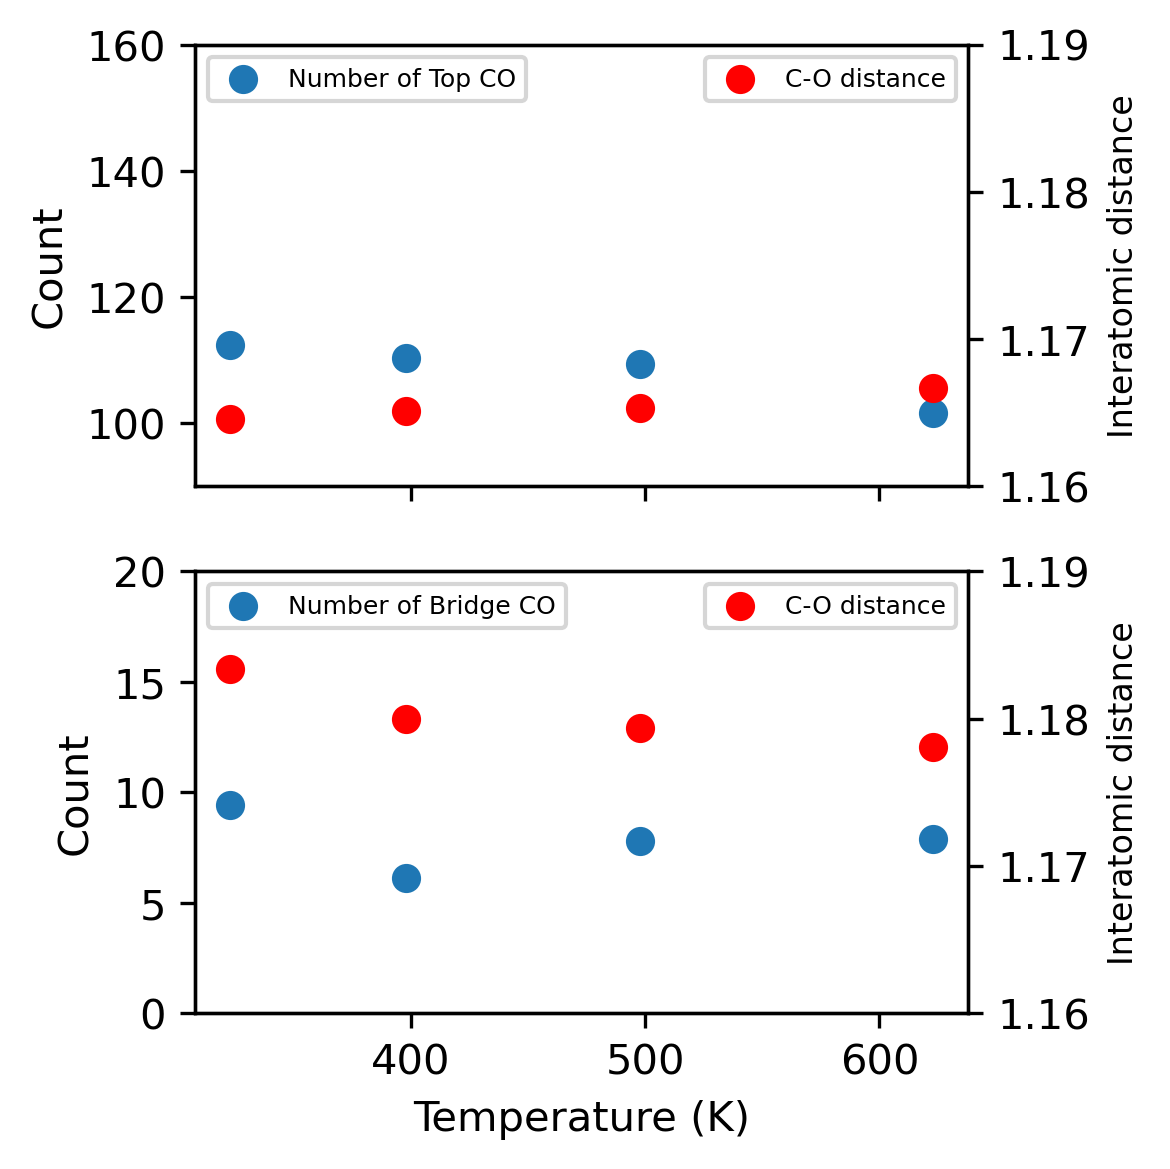

In [125]:
bond_lengths_309 = {}
for i in ["323", "398", "498", "623"]:
    n_top, n_bridge, n_multi, r_top, r_bridge, r_multi = bond_lengths(cluster_dict_309[i])
    bond_lengths_309[i] = {"n_top":n_top, "n_bridge":n_bridge,"n_multi":n_multi,"r_top":r_top,"r_bridge":r_bridge,"r_multi":r_multi}

# Assuming bond_lengths_309 is defined somewhere in your code with the necessary data

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4,4), dpi=300)

# Top
x, y = np.array([[int(i), bond_lengths_309[i]["n_top"]] for i in ["323", "398", "498", "623"]]).T
axs[0].scatter(x, y, label="Number of Top CO")
axs[0].set_ylim(90, 160)
axs[0].set_ylabel("Count")
axs[0].legend(loc="upper left", fontsize=6)

# Adding another dataset for Top on the right
ax2 = axs[0].twinx()
x, y2 = np.array([[int(i), bond_lengths_309[i]["r_top"]] for i in ["323", "398", "498", "623"]]).T
ax2.scatter(x, y2, label="C-O distance", color='r', marker='o')
ax2.set_ylabel("Interatomic distance", fontsize=8)
ax2.set_ylim(1.16, 1.19)
ax2.legend(loc="upper right", fontsize=6)

# Bridge
x, y = np.array([[int(i), bond_lengths_309[i]["n_bridge"]] for i in ["323", "398", "498", "623"]]).T
axs[1].scatter(x, y, label="Number of Bridge CO")
axs[1].set_ylim(0, 20)
axs[1].set_ylabel("Count")
axs[1].set_xlabel("Temperature (K)")
axs[1].legend(loc="upper left", fontsize=6)

# Adding another dataset for Bridge on the right
ax3 = axs[1].twinx()
x, y3 = np.array([[int(i), bond_lengths_309[i]["r_bridge"]] for i in ["323", "398", "498", "623"]]).T
ax3.scatter(x, y3, label="C-O distance", color='r', marker='o')
ax3.set_ylabel("Interatomic distance", fontsize=8)
ax3.set_ylim(1.16, 1.19)
ax3.legend(loc="upper right", fontsize=6)

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()


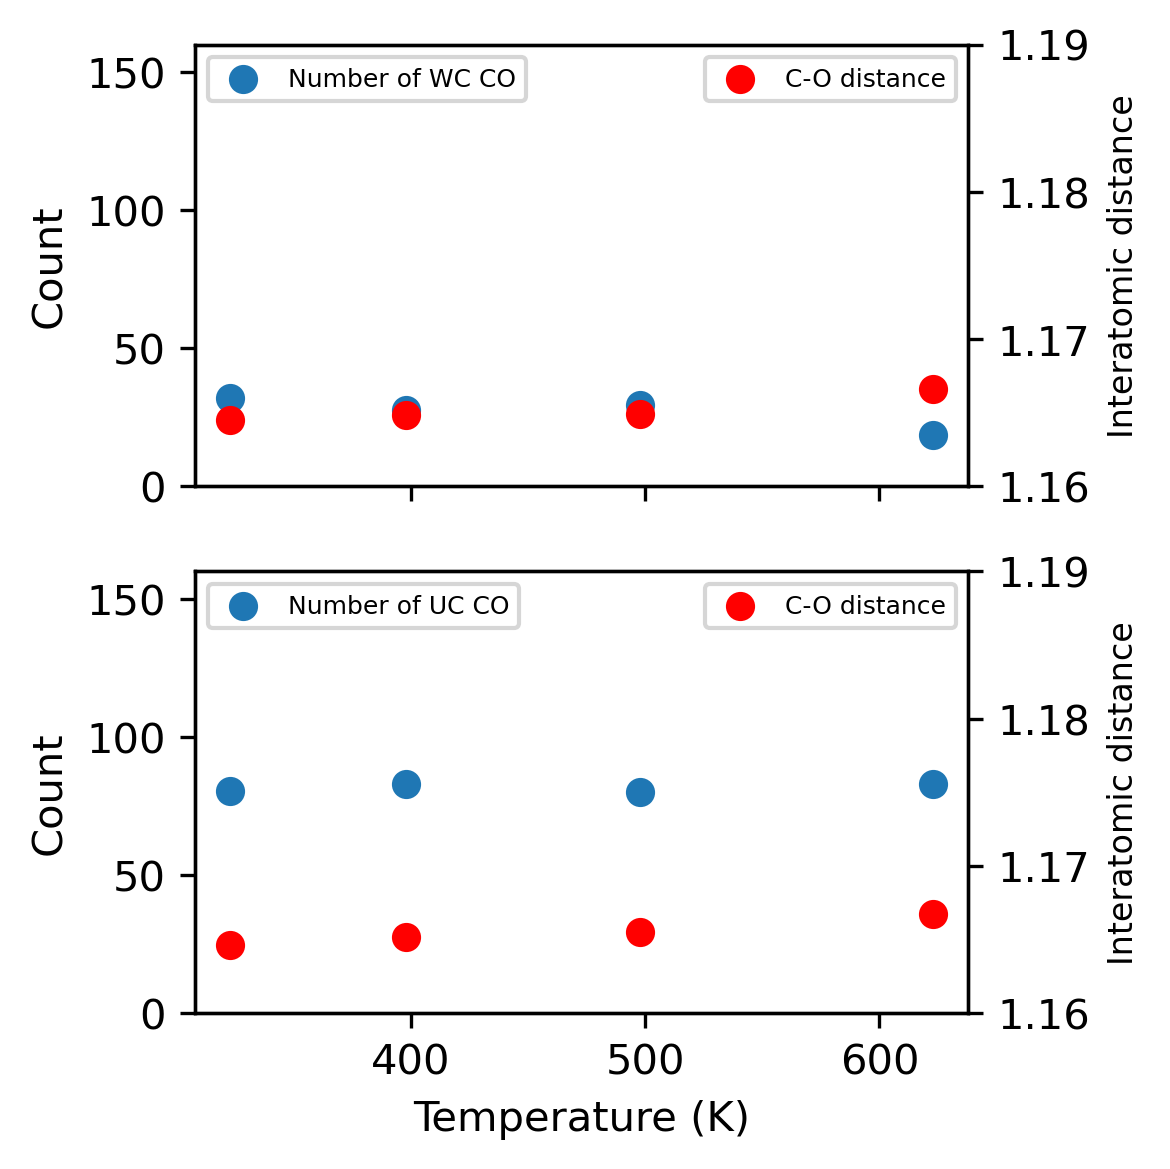

In [97]:
import matplotlib.pyplot as plt
import numpy as np

bond_lengths_309 = {}
for i in ["323", "398", "498", "623"]:
    n_WC, n_UC, n_multi, r_WC, r_UC, r_multi = bond_lengths_WCUCMC(cluster_dict_309[i])
    bond_lengths_309[i] = {"n_WC":n_WC, "n_UC":n_UC,"n_multi":n_multi,"r_WC":r_WC,"r_UC":r_UC,"r_multi":r_multi}

# Assuming bond_lengths_309 is defined somewhere in your code with the necessary data

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4,4), dpi=300)

# WC
x, y = np.array([[int(i), bond_lengths_309[i]["n_WC"]] for i in ["323", "398", "498", "623"]]).T
axs[0].scatter(x, y, label="Number of WC CO")
axs[0].set_ylim(0, 160)
axs[0].set_ylabel("Count")
axs[0].legend(loc="upper left", fontsize=6)

# Adding another dataset for WC on the right
ax2 = axs[0].twinx()
x, y2 = np.array([[int(i), bond_lengths_309[i]["r_WC"]] for i in ["323", "398", "498", "623"]]).T
ax2.scatter(x, y2, label="C-O distance", color='r', marker='o')
ax2.set_ylabel("Interatomic distance", fontsize=8)
ax2.set_ylim(1.16, 1.19)
ax2.legend(loc="upper right", fontsize=6)

# UC
x, y = np.array([[int(i), bond_lengths_309[i]["n_UC"]] for i in ["323", "398", "498", "623"]]).T
axs[1].scatter(x, y, label="Number of UC CO")
axs[1].set_ylim(0, 160)
axs[1].set_ylabel("Count")
axs[1].set_xlabel("Temperature (K)")
axs[1].legend(loc="upper left", fontsize=6)

# Adding another dataset for UC on the right
ax3 = axs[1].twinx()
x, y3 = np.array([[int(i), bond_lengths_309[i]["r_UC"]] for i in ["323", "398", "498", "623"]]).T
ax3.scatter(x, y3, label="C-O distance", color='r', marker='o')
ax3.set_ylabel("Interatomic distance", fontsize=8)
ax3.set_ylim(1.16, 1.19)
ax3.legend(loc="upper right", fontsize=6)

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()


In [50]:
data = cluster_dict_309["323"]["data"]
results = classify_and_find_distances_array(data[0], cutoff_distance=3.0, neighbor_cutoff=3.5, min_neighbors=8)
results[:,1]

array(['UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'WC', 'UC', 'UC',
       'UC', 'UC', 'UC', 'UC', 'WC', 'UC', 'WC', 'UC', 'UC', 'UC', 'UC',
       'UC', 'UC', 'UC', 'MC', 'UC', 'WC', 'WC', 'UC', 'UC', 'WC', 'WC',
       'WC', 'UC', 'WC', 'WC', 'UC', 'WC', 'UC', 'UC', 'UC', 'UC', 'UC',
       'UC', 'WC', 'UC', 'UC', 'WC', 'UC', 'UC', 'UC', 'MC', 'MC', 'WC',
       'UC', 'WC', 'WC', 'WC', 'WC', 'UC', 'WC', 'MC', 'UC', 'UC', 'UC',
       'WC', 'UC', 'MC', 'UC', 'UC', 'MC', 'UC', 'WC', 'UC', 'UC', 'UC',
       'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC', 'UC',
       'UC', 'UC', 'UC', 'UC', 'WC', 'UC', 'UC', 'UC', 'UC', 'UC', 'WC',
       'UC', 'WC', 'MC', 'UC', 'UC', 'MC', 'UC', 'WC', 'MC', 'UC', 'UC',
       'UC', 'WC', 'WC', 'MC', 'UC', 'WC', 'WC', 'MC', 'UC', 'UC', 'UC',
       'UC'], dtype=object)

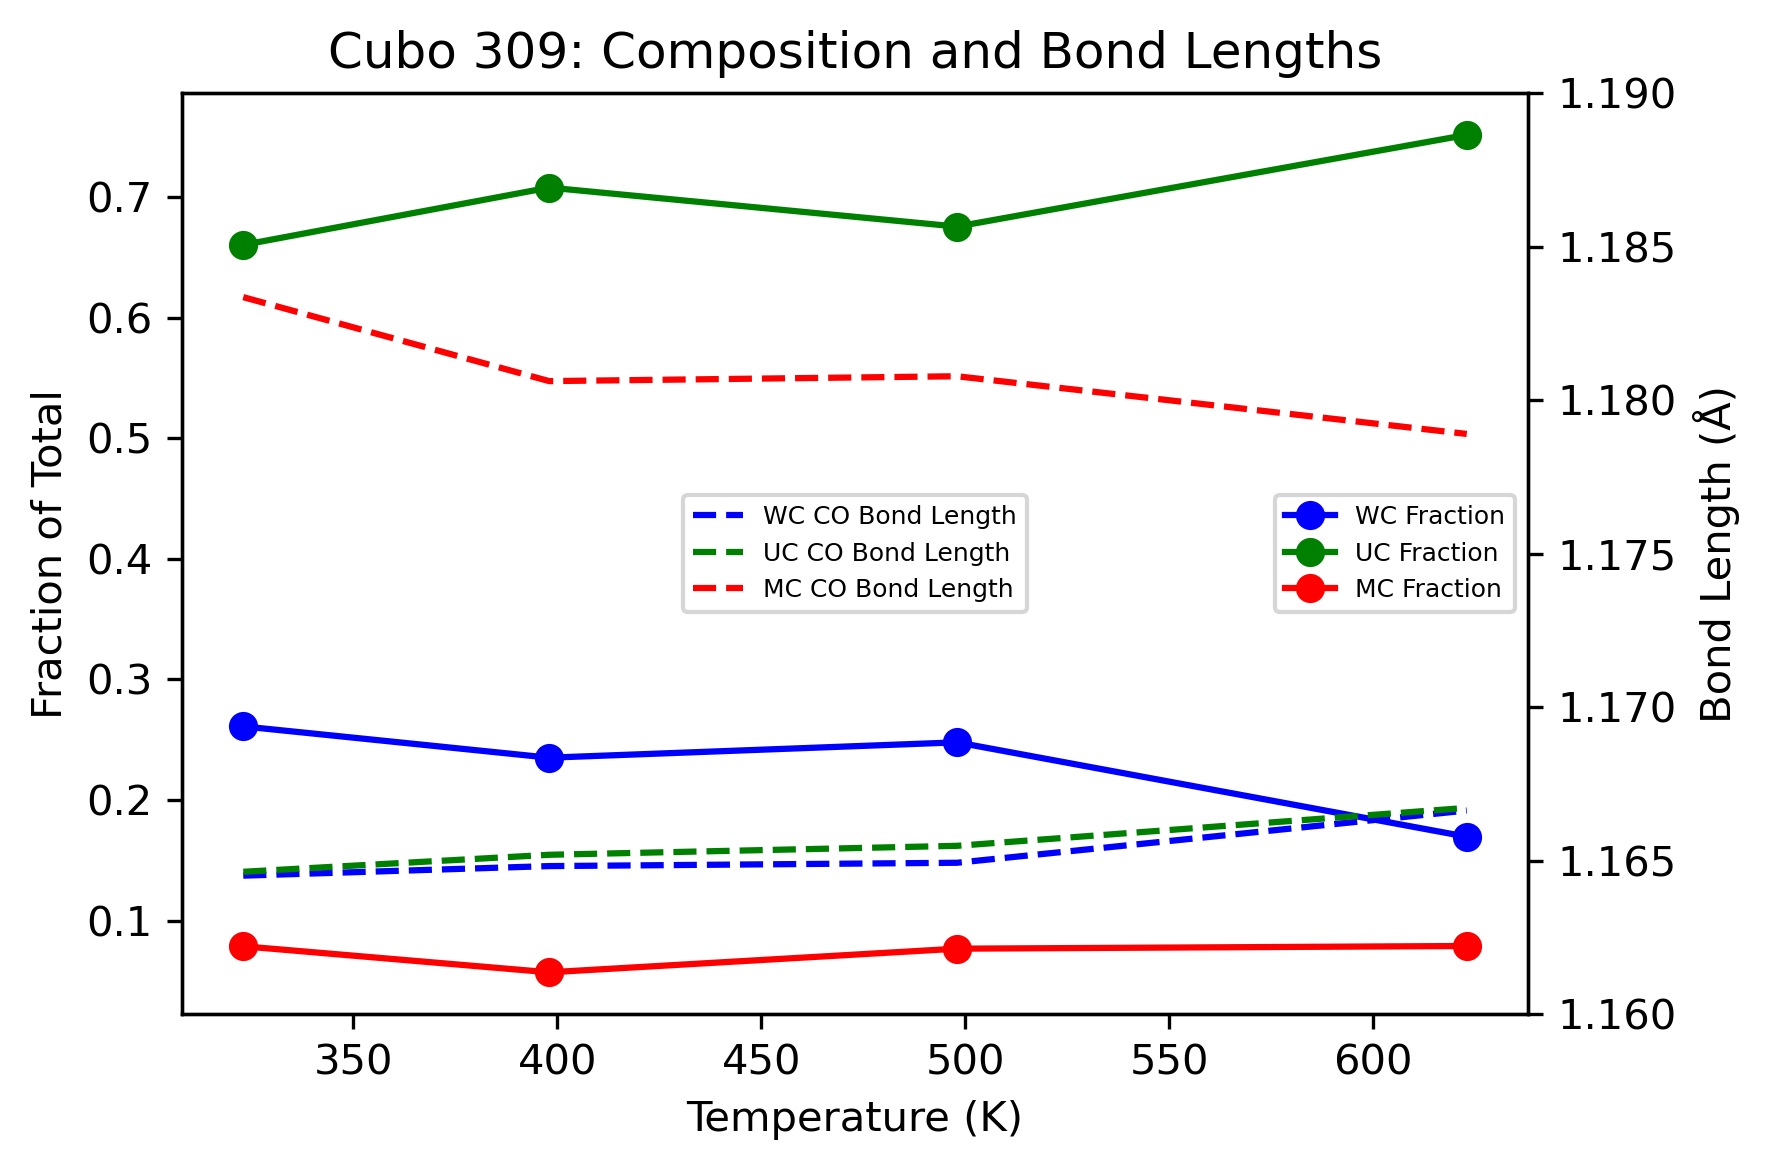

In [115]:
import matplotlib.pyplot as plt
import numpy as np

bond_lengths_309 = {}
for i in ["323", "398", "498", "623"]:
    n_WC, n_UC, n_multi, r_WC, r_UC, r_multi = bond_lengths_WCUCMC(cluster_dict_309[i])
    bond_lengths_309[i] = {"n_WC": n_WC, "n_UC": n_UC, "n_multi": n_multi, "r_WC": r_WC, "r_UC": r_UC, "r_multi": r_multi}

fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)

# Aggregate data for plotting
temperatures = np.array([int(i) for i in ["323", "398", "498", "623"]])
totals = np.array([bond_lengths_309[i]["n_WC"] + bond_lengths_309[i]["n_UC"] + bond_lengths_309[i]["n_multi"] for i in ["323", "398", "498", "623"]])
n_WC = np.array([bond_lengths_309[i]["n_WC"] / total for i, total in zip(["323", "398", "498", "623"], totals)])
n_UC = np.array([bond_lengths_309[i]["n_UC"] / total for i, total in zip(["323", "398", "498", "623"], totals)])
n_multi = np.array([bond_lengths_309[i]["n_multi"] / total for i, total in zip(["323", "398", "498", "623"], totals)])

# Plotting fractions on primary y-axis
ax1.plot(temperatures, n_WC, label="WC Fraction", marker='o', color='b')
ax1.plot(temperatures, n_UC, label="UC Fraction", marker='o', color='g')
ax1.plot(temperatures, n_multi, label="MC Fraction", marker='o', color='r')
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Fraction of Total")
ax1.legend(loc="center right", fontsize=6)

# Secondary axis for bond lengths
ax2 = ax1.twinx()
r_WC = np.array([bond_lengths_309[i]["r_WC"] for i in ["323", "398", "498", "623"]])
r_UC = np.array([bond_lengths_309[i]["r_UC"] for i in ["323", "398", "498", "623"]])
r_multi = np.array([bond_lengths_309[i]["r_multi"] for i in ["323", "398", "498", "623"]])
ax2.plot(temperatures, r_WC, label="WC CO Bond Length", linestyle='--', color='b')
ax2.plot(temperatures, r_UC, label="UC CO Bond Length", linestyle='--', color='g')
ax2.plot(temperatures, r_multi, label="MC CO Bond Length", linestyle='--', color='r')
ax2.set_ylabel("Bond Length (Å)")
ax2.set_ylim(1.16, 1.19)
ax2.legend(loc="center", fontsize=6)

plt.title("Cubo 309: Composition and Bond Lengths")
plt.tight_layout()
plt.show()

# Cubo 561

In [37]:
cluster_dict_561 = {}
#for i in ["148", "298", "398", "498", "623"]:
for i in ["298", "398", "498", "623"]:

    ###########################################

    traj_dir = '/mnt/a/MD_Trajectories/PtCO/NPs/continued/cubo_561/'
    traj_name = f"Pt561_cuboct_{i}K_7.all.bin"

    #p_name = "Pt309_cuboct_498K"
    #input_dir = "/mnt/a/MD_Trajectories/PtCO/NPs/Inputs/"
    #input_dir = "/mnt/sdcc/sdcc+u/nmarcella/MD_EXAFS_inputs/231228/"

    #pipeline.source.num_frames
    ###########################################
    
    traj_path = traj_dir + traj_name

    pipeline = import_file(traj_path)

    test_pl = MD_EXAFS_Analysis_Pipeline_PtCO(pipeline, file_params={"framerange": range(0,pipeline.source.num_frames,100),"atoms":{"Pt":1, "C":2, "O":3}, "cutoff":3}, custom_analysis_func=find_adsorbed_CO)
    #test_pl = MD_EXAFS_Binary_Pipeline_General(pipeline, file_params={"framerange": range(15999,16000),"atoms":{"Pt":1}, "cutoff":3})
    test_pl.run()

    data = test_pl.data
    n_atoms = test_pl.n_atoms_list

    n_atoms = np.array(n_atoms)
    n_co = np.mean(n_atoms[:,1])

    cluster_dict_561[i] = {"CO" :n_atoms[:,1], "data":data}


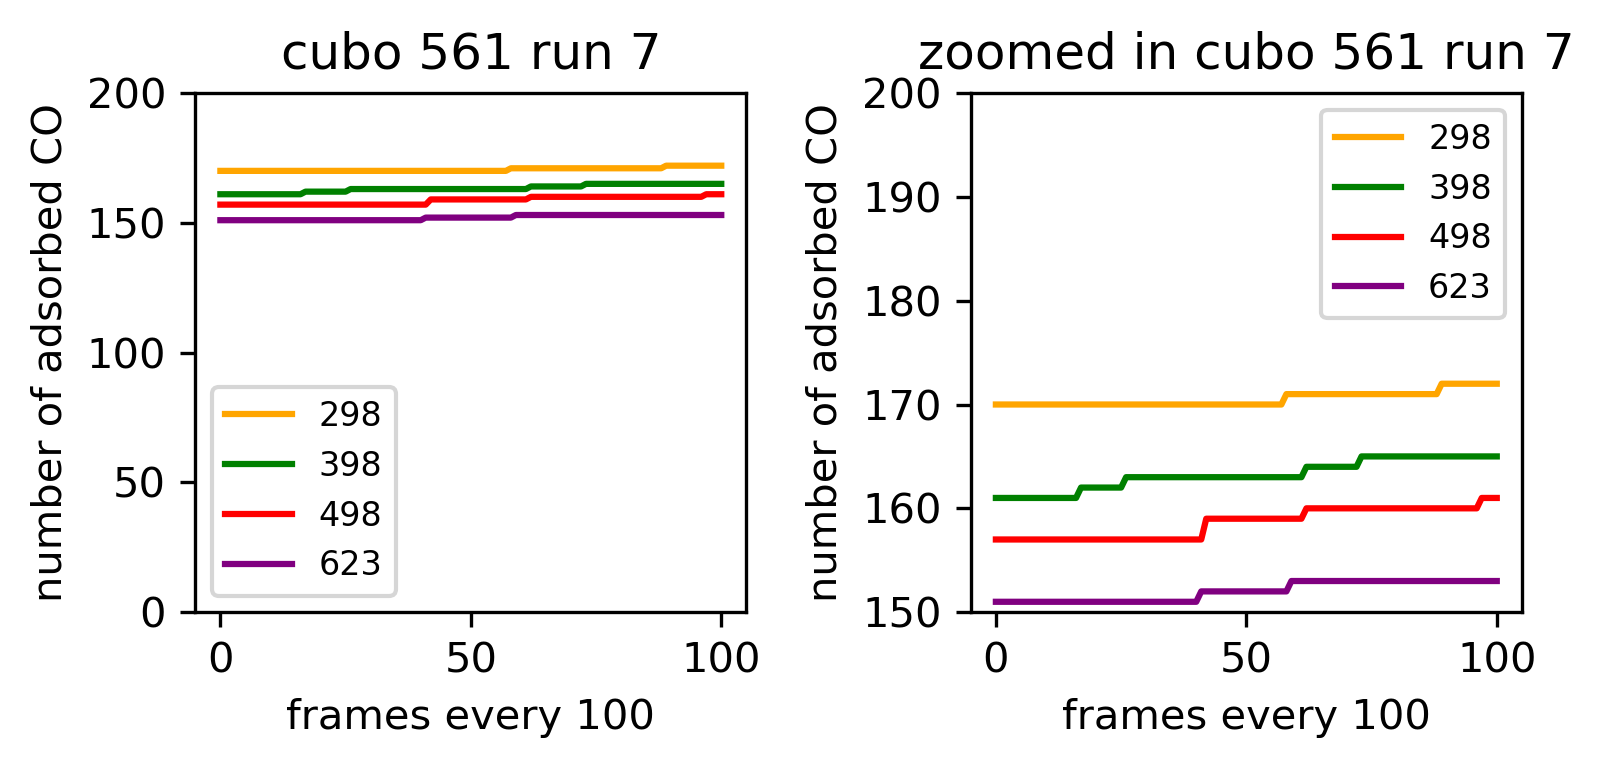

In [38]:
size = 561
run = 7 

fig, ax = plt.subplots(1,2,figsize=(2*2.66,2.66), dpi=300)

colors = {"148":"blue", "298":"orange","398":"green", "498":"red", "623":"purple", "323":"black"}
for i in ["298", "398", "498", "623"]:
    ax[0].plot(cluster_dict_561[i]["CO"], label=i, color=colors[i])
ax[0].set_title(f"cubo {size} run {run}")
ax[0].set_ylabel("number of adsorbed CO")
ax[0].set_xlabel("frames every 100")
ax[0].set_ylim(0,200)
ax[0].legend(fontsize=8)

for i in ["298", "398", "498", "623"]:
    ax[1].plot(cluster_dict_561[i]["CO"], label=i, color=colors[i])
ax[1].set_title(f"zoomed in cubo {size} run {run}")
ax[1].set_ylabel("number of adsorbed CO")
ax[1].set_xlabel("frames every 100")
ax[1].set_ylim(150,200)
ax[1].legend(fontsize=8)

fig.tight_layout()

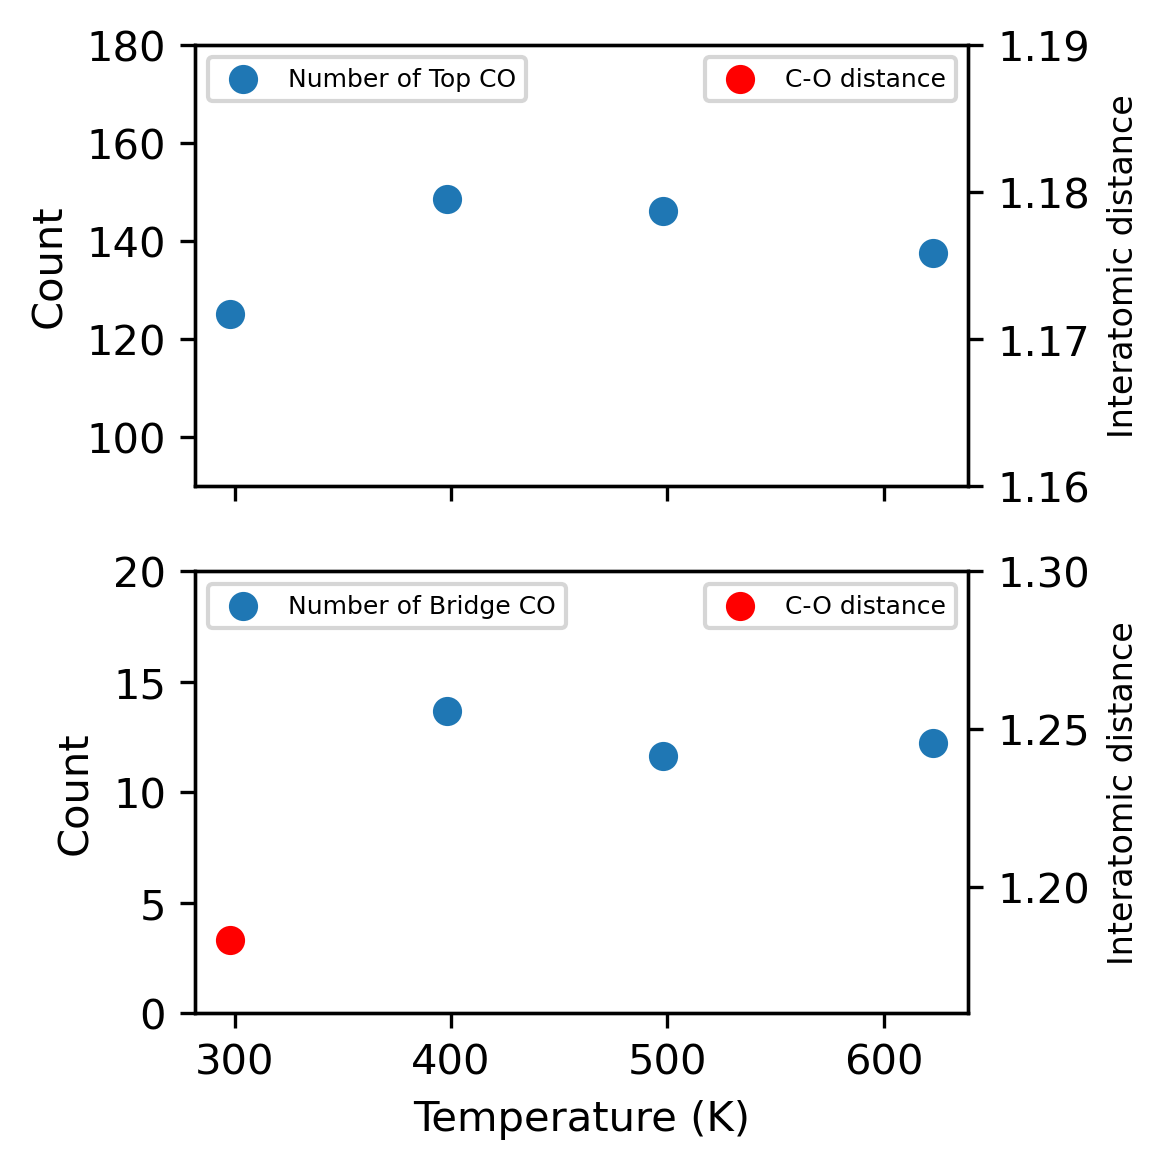

In [128]:
bond_lengths_561 = {}
for i in ["298", "398", "498", "623"]:
    n_top, n_bridge, n_multi, r_top, r_bridge, r_multi = bond_lengths(cluster_dict_561[i])
    bond_lengths_561[i] = {"n_top":n_top, "n_bridge":n_bridge,"n_multi":n_multi,"r_top":r_top,"r_bridge":r_bridge,"r_multi":r_multi}

# Assuming bond_lengths_561 is defined somewhere in your code with the necessary data

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4,4), dpi=300)

# Top
x, y = np.array([[int(i), bond_lengths_561[i]["n_top"]] for i in ["298", "398", "498", "623"]]).T
axs[0].scatter(x, y, label="Number of Top CO")
axs[0].set_ylim(90, 180)
axs[0].set_ylabel("Count")
axs[0].legend(loc="upper left", fontsize=6)

# Adding another dataset for Top on the right
ax2 = axs[0].twinx()
x, y2 = np.array([[int(i), bond_lengths_561[i]["r_top"]] for i in ["298", "398", "498", "623"]]).T
ax2.scatter(x, y2, label="C-O distance", color='r', marker='o')
ax2.set_ylabel("Interatomic distance", fontsize=8)
ax2.set_ylim(1.16, 1.19)
ax2.legend(loc="upper right", fontsize=6)

# Bridge
x, y = np.array([[int(i), bond_lengths_561[i]["n_bridge"]] for i in ["298", "398", "498", "623"]]).T
axs[1].scatter(x, y, label="Number of Bridge CO")
axs[1].set_ylim(0, 20)
axs[1].set_ylabel("Count")
axs[1].set_xlabel("Temperature (K)")
axs[1].legend(loc="upper left", fontsize=6)

# Adding another dataset for Bridge on the right
ax3 = axs[1].twinx()
x, y3 = np.array([[int(i), bond_lengths_561[i]["r_bridge"]] for i in ["298", "398", "498", "623"]]).T
ax3.scatter(x, y3, label="C-O distance", color='r', marker='o')
ax3.set_ylabel("Interatomic distance", fontsize=8)
ax3.set_ylim(1.16, 1.3)
ax3.legend(loc="upper right", fontsize=6)

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()


In [129]:
y2

array([ 1.20383236,  2.84337171,  5.45659569, 11.9236659 ])

In [130]:
r_top

11.923665904545013

# Trouble Shoot

In [81]:
def classify_and_find_distances_array(array, cutoff_distance=3.0, neighbor_cutoff=3.0, min_neighbors=8):
    # Isolate atoms of each type and their indices
    indices_type_1 = np.where(array[:, 3] == 1)[0]
    atoms_type_1 = array[indices_type_1, :3]
    indices_type_2 = np.where(array[:, 3] == 2)[0]
    atoms_type_2 = array[indices_type_2, :3]
    indices_type_3 = np.where(array[:, 3] == 3)[0]
    atoms_type_3 = array[indices_type_3, :3]
    
    # Calculate distances for bonding classification (type 1 and type 2 atoms)
    distances_1_2 = cdist(atoms_type_1, atoms_type_2)
    bonded_1_2 = distances_1_2 < cutoff_distance
    bonded_counts = np.sum(bonded_1_2, axis=0)
    
    # Determine the neighbor count for each type 1 atom
    distances_1_1 = cdist(atoms_type_1, atoms_type_1)
    neighbor_counts = np.sum(distances_1_1 < neighbor_cutoff, axis=1) - 1  # exclude self-counting

    # Classify type 2 atoms based on bonding rules
    classifications = np.full(len(atoms_type_2), 'MC', dtype=object)
    for i in range(len(atoms_type_2)):
        bonded_type_1_indices = np.where(bonded_1_2[:, i])[0]
        if bonded_counts[i] == 1:
            primary_neighbor_index = bonded_type_1_indices[0]
            primary_neighbor_count = neighbor_counts[primary_neighbor_index]
            if primary_neighbor_count >= min_neighbors:
                classifications[i] = 'WC'
            else:
                classifications[i] = 'UC'
        elif bonded_counts[i] < 1:
            classifications[i] = 'NC'  # No connection

    # Calculate distances for pairing (type 2 and type 3 atoms)
    distances_2_3 = cdist(atoms_type_2, atoms_type_3)
    row_ind, col_ind = linear_sum_assignment(distances_2_3)
    paired_distances = distances_2_3[row_ind, col_ind]

    # Compile results into an array
    results_array = np.zeros((len(row_ind), 5), dtype=object)
    for i, idx2 in enumerate(indices_type_2[row_ind]):
        classification = classifications[row_ind[i]]
        distance = paired_distances[i]
        idx3 = indices_type_3[col_ind[i]]
        results_array[i] = [idx2, classification, distance, idx3, bonded_counts[row_ind[i]]]
    
    return results_array

In [83]:
data = cluster_dict_309["323"]["data"]
results = classify_and_find_distances_array(data[0], cutoff_distance=3.0, neighbor_cutoff=3.5, min_neighbors=8)
results

array([[309, 'UC', 1.1415081383853545, 431, 1],
       [310, 'UC', 1.1619031500086399, 432, 1],
       [311, 'UC', 1.1558099194936862, 433, 1],
       [312, 'UC', 1.1815957811366786, 434, 1],
       [313, 'UC', 1.1634347682616326, 435, 1],
       [314, 'UC', 1.1905989501087242, 436, 1],
       [315, 'UC', 1.1752182180344228, 437, 1],
       [316, 'UC', 1.1744672111217063, 438, 1],
       [317, 'WC', 1.1620365484785724, 439, 1],
       [318, 'UC', 1.1730323354451933, 440, 1],
       [319, 'UC', 1.1667991300990952, 441, 1],
       [320, 'UC', 1.1717626252786861, 442, 1],
       [321, 'UC', 1.145086725973193, 443, 1],
       [322, 'UC', 1.1412197246805726, 444, 1],
       [323, 'UC', 1.1706167348880676, 445, 1],
       [324, 'WC', 1.1449658422852624, 446, 1],
       [325, 'UC', 1.1555169362670539, 447, 1],
       [326, 'WC', 1.1707974589996353, 448, 1],
       [327, 'UC', 1.1674652286042635, 449, 1],
       [328, 'UC', 1.1547819880826005, 450, 1],
       [329, 'UC', 1.1641538815809525, 45

In [79]:
import numpy as np

def write_xyz_file(data_array, filename="output.xyz"):
    """
    Write an array of atomic positions and types to an XYZ file format.

    Parameters:
    data_array (np.array): An Nx4 numpy array where each row is [x, y, z, type].
    filename (str): The name of the file to write the data to.
    """
    # Define atom type dictionary (customize as necessary)
    atom_types = {1: 'Pt', 2: 'C', 3: 'O'}  # Example: 1->Oxygen, 2->Hydrogen, 3->Carbon

    # Prepare the lines to write in the XYZ file
    lines = []
    lines.append(f"{len(data_array)}\n")  # Number of atoms
    lines.append("Atoms. Columns are: x, y, z, type\n")  # Comment line

    for atom in data_array:
        x, y, z, atom_type = atom
        atom_label = atom_types.get(int(atom_type), "X")  # Use 'X' if type is unknown
        lines.append(f"{atom_label} {x:.4f} {y:.4f} {z:.4f}\n")

    # Write to file
    with open(filename, 'w') as file:
        file.writelines(lines)

    print(f"File '{filename}' written with {len(data_array)} atoms.")

# Example usage:
# data_array = np.array([...])  # Your Nx4 array
# write_xyz_file(data_array, "my_atoms.xyz")


In [80]:
write_xyz_file(data[0], "my_atoms.xyz")

File 'my_atoms.xyz' written with 553 atoms.
